<h1> Time series prediction, end-to-end </h1>

This notebook illustrates several models to find the next value of a time-series:
<ol>
<li> Linear
<li> DNN
<li> CNN 
<li> RNN
</ol>

<h3> Simulate some time-series data </h3>

Essentially a set of sinusoids with random amplitudes and frequencies.

In [1]:
import tensorflow as tf
print(tf.__version__)

2.7.0


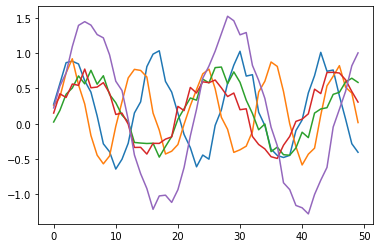

In [2]:
import numpy as np
import matplotlib.pyplot as plt

SEQ_LEN = 50

def create_time_series():
    freq = (np.random.random()*0.5) + 0.1  # 0.1 to 0.6
    ampl = np.random.random() + 0.5  # 0.5 to 1.5
    noise = [np.random.random()*0.3 for i in range(SEQ_LEN)] # -0.3 to +0.3 uniformly distributed
    x = np.sin(np.arange(0,SEQ_LEN) * freq) * ampl + noise
    return x

flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
for i in range(0, 5):
    plt.plot(create_time_series());  # 5 series

In [3]:
def to_csv(filename, N):
    with open(filename, 'w') as ofp:
        for lineno in range(0, N):
            seq = create_time_series()
            line = ",".join(map(str, seq))
            ofp.write(line + '\n')

import os
try:
    os.makedirs("data/sines/")
except OSError:
    pass

np.random.seed(1) # makes data generation reproducible

to_csv("data/sines/train-1.csv", 1000)  # 1000 sequences
to_csv("data/sines/valid-1.csv", 250)

<h3> Read the data in a Pandas dataframe </h3>

Make sure the code works as intended.

In [11]:
TIMESERIES_COL = 'height'
N_OUTPUTS = 1  # in each sequence, 1-49 are features, and 50 is label
SEQ_LEN = None
DEFAULTS = None
N_INPUTS = 49

import pandas as pd

train = pd.read_csv("data/sines/train-1.csv", header=None)
valid = pd.read_csv("data/sines/valid-1.csv", header=None)

X = train.iloc[:,:48]
y = train.iloc[:, 49]


Xv = valid.iloc[:,:48]
yv = valid.iloc[:, 49]

<h3> Model </h3>

Linear, DNN, CNN, RNN.

Epoch 1/300
32/32 [==============================] - 0s 7ms/step - loss: 0.7674 - mse: 0.7674
Epoch 2/300
32/32 [==============================] - 0s 5ms/step - loss: 0.4577 - mse: 0.4577
Epoch 3/300
32/32 [==============================] - 0s 6ms/step - loss: 0.3337 - mse: 0.3337
Epoch 4/300
32/32 [==============================] - 0s 6ms/step - loss: 0.2747 - mse: 0.2747
Epoch 5/300
32/32 [==============================] - 0s 7ms/step - loss: 0.2412 - mse: 0.2412
Epoch 6/300
32/32 [==============================] - 0s 6ms/step - loss: 0.2207 - mse: 0.2207
Epoch 7/300
32/32 [==============================] - 0s 6ms/step - loss: 0.2070 - mse: 0.2070
Epoch 8/300
32/32 [==============================] - 0s 6ms/step - loss: 0.1966 - mse: 0.1966
Epoch 9/300
32/32 [==============================] - 0s 5ms/step - loss: 0.1877 - mse: 0.1877
Epoch 10/300
32/32 [==============================] - 0s 6ms/step - loss: 0.1807 - mse: 0.1807
Epoch 11/300
32/32 [==============================] - 0s 6m

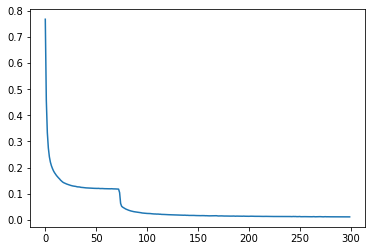

In [22]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.InputLayer(input_shape = [48], name = TIMESERIES_COL))

# comment the line below for linear model
model.add(tf.keras.layers.Dense(5, activation='relu'))
model.add(tf.keras.layers.Dense(1))

model.compile(optimizer='adam', loss = "mse", metrics = ["mse"])
history = model.fit(X, y, epochs=300)

plt.plot(history.history['loss'])

In [ ]:
model.evaluate(Xv, yv)

In [15]:
X_np = X.to_numpy()
X_np.shape

(1000, 48)

In [31]:
model_cnn = tf.keras.models.Sequential(
    [
        tf.keras.layers.InputLayer(input_shape = [N_INPUTS - 1], name = TIMESERIES_COL),
        tf.keras.layers.Reshape(target_shape = [N_INPUTS - 1, 1]),
        tf.keras.layers.Conv1D(filters = (N_INPUTS - 1) // 2, kernel_size = 3, padding = "same", activation = tf.nn.relu),
        tf.keras.layers.MaxPooling1D(pool_size = 2, strides = 2),
        tf.keras.layers.Conv1D(filters = (N_INPUTS -1) // 2, kernel_size = 3, padding = "same", activation = tf.nn.relu),
        tf.keras.layers.MaxPooling1D(pool_size = 2, strides = 2),

        tf.keras.layers.Flatten(), #### THIS MAKES ALL THE DIFFERENCE
        
        tf.keras.layers.Dense(units = 3, activation = tf.nn.relu),
        tf.keras.layers.Dense(units = 1, activation = None)
    ])

model_cnn.compile(optimizer='adam', loss = "mse", metrics = ["mse"])

history = model_cnn.fit(X_np, y, epochs=300)

Epoch 1/300
32/32 [==============================] - 1s 12ms/step - loss: 0.4862 - mse: 0.4862
Epoch 2/300
32/32 [==============================] - 0s 12ms/step - loss: 0.3604 - mse: 0.3604
Epoch 3/300
32/32 [==============================] - 0s 9ms/step - loss: 0.2720 - mse: 0.2720
Epoch 4/300
32/32 [==============================] - 0s 9ms/step - loss: 0.2038 - mse: 0.2038
Epoch 5/300
32/32 [==============================] - 0s 9ms/step - loss: 0.1680 - mse: 0.1680
Epoch 6/300
32/32 [==============================] - 0s 12ms/step - loss: 0.1471 - mse: 0.1471
Epoch 7/300
32/32 [==============================] - 0s 12ms/step - loss: 0.1331 - mse: 0.1331
Epoch 8/300
32/32 [==============================] - 0s 10ms/step - loss: 0.1230 - mse: 0.1230
Epoch 9/300
32/32 [==============================] - 0s 10ms/step - loss: 0.1132 - mse: 0.1132
Epoch 10/300
32/32 [==============================] - 0s 10ms/step - loss: 0.1049 - mse: 0.1049
Epoch 11/300
32/32 [==============================] 

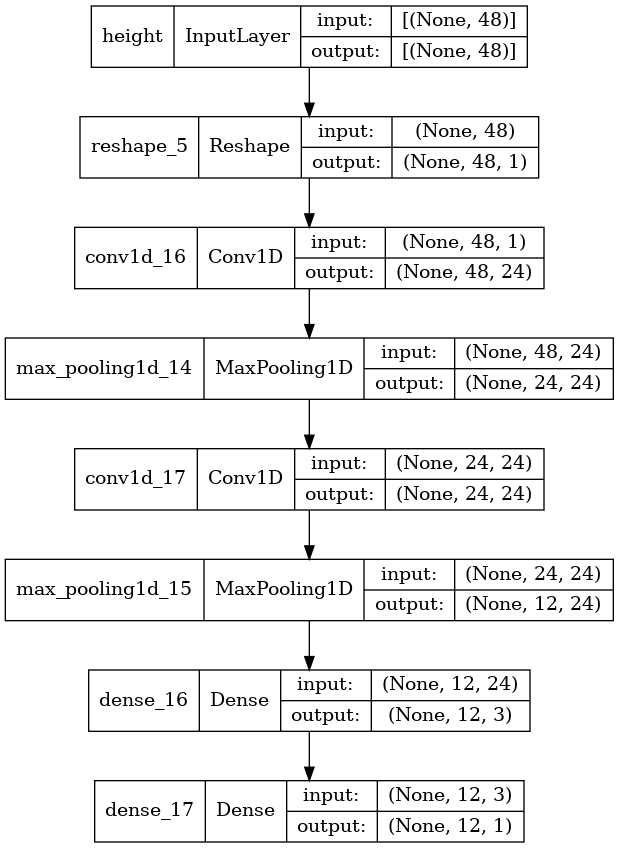

In [29]:
tf.keras.utils.plot_model(model_cnn, show_shapes=True)

In [32]:
model_cnn.evaluate(Xv, yv)

8/8 [==============================] - 0s 4ms/step - loss: 0.0140 - mse: 0.0140


[0.014040338806807995, 0.014040338806807995]

## Results

When I ran it, these were the RMSEs that I got for different models:

| Model | Sequence length | # of steps | Minutes | RMSE |
| --- | ----| --- | --- | --- | 
| linear | 50 | 3000 | 10 min | 0.150 |
| dnn | 50 | 3000 | 10 min | 0.101 |
| cnn | 50 | 3000 | 10 min | 0.105 |
| rnn | 50 | 3000 | 11 min | 0.100 |
| rnn2 | 50 | 3000 | 14 min |0.105 |
| rnnN | 50 | 3000 | 15 min | 0.097 |

### Analysis
You can see there is a significant improvement when switching from the linear model to non-linear models. But within the the non-linear models (DNN/CNN/RNN) performance for all is pretty similar. 

Perhaps it's because this is too simple of a problem to require advanced deep learning models. In the next lab we'll deal with a problem where an RNN is more appropriate.